In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('amazon_product.csv')
df.head()

,Unnamed: 0,asin,product_title,product_price,product_original_price,currency,product_star_rating,product_num_ratings,product_url,product_photo,...,is_best_seller,is_amazon_choice,is_prime,climate_pledge_friendly,sales_volume,delivery,has_variations,product_availability,unit_price,unit_count
0,0,B0BQ118F2T,Moto G Play 2023 3-Day Battery Unlocked Made f...,$99.99,$169.99,USD,4.0,2929,https://www.amazon.com/dp/B0BQ118F2T,https://m.media-amazon.com/images/I/61K1Fz5Lxv...,...,False,False,True,False,6K+ bought in past month,"FREE delivery Tue, Aug 6",True,NaN,NaN,NaN
1,1,B0CTD47P22,"SAMSUNG Galaxy A15 5G (SM-156M/DSN), 128GB 6GB...",$149.74,$158.00,USD,4.2,135,https://www.amazon.com/dp/B0CTD47P22,https://m.media-amazon.com/images/I/51QhB2CfqS...,...,False,False,True,False,3K+ bought in past month,"FREE delivery Wed, Aug 7 Only 7 left in stock ...",False,Only 7 left in stock - order soon.,NaN,NaN
2,2,B0CHH6X6H2,Total by Verizon | Samsung Galaxy A03s | Locke...,$49.88,NaN,USD,3.9,205,https://www.amazon.com/dp/B0CHH6X6H2,https://m.media-amazon.com/images/I/812woqv69C...,...,False,False,True,False,2K+ bought in past month,"FREE delivery Tue, Aug 6",False,NaN,NaN,NaN
3,3,B0BZ9XNBRB,Google Pixel 7a - Unlocked Android Cell Phone ...,$335.00,$499.00,USD,4.3,2248,https://www.amazon.com/dp/B0BZ9XNBRB,https://m.media-amazon.com/images/I/61r7cCpQPl...,...,False,False,False,False,10K+ bought in past month,FREE delivery Aug 6 - 8,True,NaN,NaN,NaN
4,4,B0CN1QSH8Q,"SAMSUNG Galaxy A15 5G A Series Cell Phone, 128...",$199.99,NaN,USD,4.1,423,https://www.amazon.com/dp/B0CN1QSH8Q,https://m.media-amazon.com/images/I/61s0ZzwzSC...,...,False,False,True,True,3K+ bought in past month,"FREE delivery Tue, Aug 6",True,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   64 non-null     int64  
 1   asin                         64 non-null     object 
 2   product_title                64 non-null     object 
 3   product_price                64 non-null     object 
 4   product_original_price       27 non-null     object 
 5   currency                     64 non-null     object 
 6   product_star_rating          54 non-null     float64
 7   product_num_ratings          64 non-null     int64  
 8   product_url                  64 non-null     object 
 9   product_photo                64 non-null     object 
 10  product_num_offers           64 non-null     int64  
 11  product_minimum_offer_price  64 non-null     object 
 12  is_best_seller               64 non-null     bool   
 13  is_amazon_choice      

In [4]:
df = df.iloc[:, 2:]
df.drop(columns=['product_url', 'product_photo', 'currency',
                 'unit_count', 'unit_price', 'product_availability'], inplace=True)

In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:
df.product_price = df.product_price.str.lstrip('$')
df.product_original_price = df.product_original_price.str.lstrip('$')

In [7]:
df.product_price = df.product_price.astype(float)
df.product_original_price = df.product_original_price.astype(float)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   product_title                64 non-null     object 
 1   product_price                64 non-null     float64
 2   product_original_price       27 non-null     float64
 3   product_star_rating          54 non-null     float64
 4   product_num_ratings          64 non-null     int64  
 5   product_num_offers           64 non-null     int64  
 6   product_minimum_offer_price  64 non-null     object 
 7   is_best_seller               64 non-null     bool   
 8   is_amazon_choice             64 non-null     bool   
 9   is_prime                     64 non-null     bool   
 10  climate_pledge_friendly      64 non-null     bool   
 11  sales_volume                 61 non-null     object 
 12  delivery                     63 non-null     object 
 13  has_variations        

In [9]:
df.describe()

,product_price,product_original_price,product_star_rating,product_num_ratings,product_num_offers
count,64.000000,27.000000,54.000000,6.400000e+01,64.000000
mean,55.983906,129.387778,4.244444,5.210164e+04,4.859375
std,91.710499,166.997257,0.558187,1.576855e+05,8.145243
min,0.000000,3.990000,1.800000,0.000000e+00,1.000000
25%,1.915000,27.995000,4.100000,4.775000e+01,1.000000
50%,23.085000,56.950000,4.400000,9.675000e+02,1.000000
75%,61.812500,153.995000,4.600000,1.384625e+04,4.000000
max,499.000000,699.000000,4.800000,1.015448e+06,34.000000


### Cet article a + d'1M de rating

In [10]:
df.loc[df['product_num_ratings'] == df['product_num_ratings'].max()]

,product_title,product_price,product_original_price,product_star_rating,product_num_ratings,product_num_offers,product_minimum_offer_price,is_best_seller,is_amazon_choice,is_prime,climate_pledge_friendly,sales_volume,delivery,has_variations
55,Disney+,0.0,NaN,4.4,1015448,1,$0.00,False,False,False,False,"Oct 11, 2019",Available instantly on compatible devices,False


# Statistiques
- Quel % de produit est un best seller
- Quel % de produit est un choix d'Amazon
- Quel % de produit est éligible prime

In [11]:
df.head()

,product_title,product_price,product_original_price,product_star_rating,product_num_ratings,product_num_offers,product_minimum_offer_price,is_best_seller,is_amazon_choice,is_prime,climate_pledge_friendly,sales_volume,delivery,has_variations
0,Moto G Play 2023 3-Day Battery Unlocked Made f...,99.99,169.99,4.0,2929,10,$64.89,False,False,True,False,6K+ bought in past month,"FREE delivery Tue, Aug 6",True
1,"SAMSUNG Galaxy A15 5G (SM-156M/DSN), 128GB 6GB...",149.74,158.00,4.2,135,8,$145.87,False,False,True,False,3K+ bought in past month,"FREE delivery Wed, Aug 7 Only 7 left in stock ...",False
2,Total by Verizon | Samsung Galaxy A03s | Locke...,49.88,NaN,3.9,205,1,$49.88,False,False,True,False,2K+ bought in past month,"FREE delivery Tue, Aug 6",False
3,Google Pixel 7a - Unlocked Android Cell Phone ...,335.00,499.00,4.3,2248,30,$289.99,False,False,False,False,10K+ bought in past month,FREE delivery Aug 6 - 8,True
4,"SAMSUNG Galaxy A15 5G A Series Cell Phone, 128...",199.99,NaN,4.1,423,2,$150.09,False,False,True,True,3K+ bought in past month,"FREE delivery Tue, Aug 6",True


In [12]:
# Best seller en %
len(df[df['is_best_seller'] == True]) / len(df) * 100

37.5

In [13]:
# Choix d'Amazon en %
len(df[df['is_amazon_choice'] == True]) / len(df) * 100

3.125

In [14]:
# éligible prime en %
len(df[df['is_prime'] == True]) / len(df) * 100

62.5

### Analyse des réductions

In [15]:
df['discount'] = 100 - (df['product_price'] * 100 / df['product_original_price'])

In [16]:
# En supposant que les valeurs sont NaN s'il n'y a pas de réduction
# on obtient des NaN dans notre nouvelle colonne discount, qu'on remplace par 0
# pour indiquer 0% de réduction
df['discount'] = df['discount'].fillna(0)

In [17]:
df.head()

,product_title,product_price,product_original_price,product_star_rating,product_num_ratings,product_num_offers,product_minimum_offer_price,is_best_seller,is_amazon_choice,is_prime,climate_pledge_friendly,sales_volume,delivery,has_variations,discount
0,Moto G Play 2023 3-Day Battery Unlocked Made f...,99.99,169.99,4.0,2929,10,$64.89,False,False,True,False,6K+ bought in past month,"FREE delivery Tue, Aug 6",True,41.178893
1,"SAMSUNG Galaxy A15 5G (SM-156M/DSN), 128GB 6GB...",149.74,158.00,4.2,135,8,$145.87,False,False,True,False,3K+ bought in past month,"FREE delivery Wed, Aug 7 Only 7 left in stock ...",False,5.227848
2,Total by Verizon | Samsung Galaxy A03s | Locke...,49.88,NaN,3.9,205,1,$49.88,False,False,True,False,2K+ bought in past month,"FREE delivery Tue, Aug 6",False,0.000000
3,Google Pixel 7a - Unlocked Android Cell Phone ...,335.00,499.00,4.3,2248,30,$289.99,False,False,False,False,10K+ bought in past month,FREE delivery Aug 6 - 8,True,32.865731
4,"SAMSUNG Galaxy A15 5G A Series Cell Phone, 128...",199.99,NaN,4.1,423,2,$150.09,False,False,True,True,3K+ bought in past month,"FREE delivery Tue, Aug 6",True,0.000000


### Analyse des revues et nombres d'étoiles

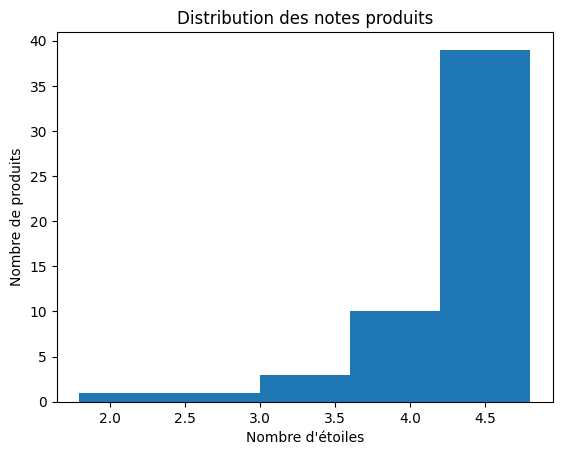

In [18]:
df_sorted = df.sort_values('product_star_rating')
df_sorted['product_star_rating'].plot(kind='hist', bins=5)
plt.title("Distribution des notes produits")
plt.xlabel("Nombre d'étoiles")
plt.ylabel("Nombre de produits")
plt.show()

In [19]:
# Il y a quelques NaN parmis product_star_rating qu'on va supprimer avant
df_2 = df.dropna(subset=['product_num_ratings'])

In [20]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   product_title                64 non-null     object 
 1   product_price                64 non-null     float64
 2   product_original_price       27 non-null     float64
 3   product_star_rating          54 non-null     float64
 4   product_num_ratings          64 non-null     int64  
 5   product_num_offers           64 non-null     int64  
 6   product_minimum_offer_price  64 non-null     object 
 7   is_best_seller               64 non-null     bool   
 8   is_amazon_choice             64 non-null     bool   
 9   is_prime                     64 non-null     bool   
 10  climate_pledge_friendly      64 non-null     bool   
 11  sales_volume                 61 non-null     object 
 12  delivery                     63 non-null     object 
 13  has_variations        

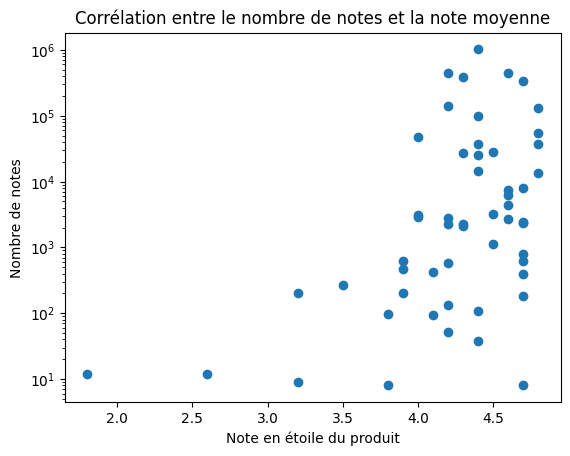

In [21]:
# Corrélation entre le nombre de notes et la note moyenne 
plt.scatter(x=df_2.product_star_rating, y=df_2.product_num_ratings)
# L'échelle logarithmique pour que les outliers n'écrasent pas toute la distribution
plt.yscale('log')
plt.title("Corrélation entre le nombre de notes et la note moyenne")
plt.xlabel("Note en étoile du produit")
plt.ylabel("Nombre de notes")
plt.show()

### Analyse de Volume de Ventes

In [22]:
df.head()

,product_title,product_price,product_original_price,product_star_rating,product_num_ratings,product_num_offers,product_minimum_offer_price,is_best_seller,is_amazon_choice,is_prime,climate_pledge_friendly,sales_volume,delivery,has_variations,discount
0,Moto G Play 2023 3-Day Battery Unlocked Made f...,99.99,169.99,4.0,2929,10,$64.89,False,False,True,False,6K+ bought in past month,"FREE delivery Tue, Aug 6",True,41.178893
1,"SAMSUNG Galaxy A15 5G (SM-156M/DSN), 128GB 6GB...",149.74,158.00,4.2,135,8,$145.87,False,False,True,False,3K+ bought in past month,"FREE delivery Wed, Aug 7 Only 7 left in stock ...",False,5.227848
2,Total by Verizon | Samsung Galaxy A03s | Locke...,49.88,NaN,3.9,205,1,$49.88,False,False,True,False,2K+ bought in past month,"FREE delivery Tue, Aug 6",False,0.000000
3,Google Pixel 7a - Unlocked Android Cell Phone ...,335.00,499.00,4.3,2248,30,$289.99,False,False,False,False,10K+ bought in past month,FREE delivery Aug 6 - 8,True,32.865731
4,"SAMSUNG Galaxy A15 5G A Series Cell Phone, 128...",199.99,NaN,4.1,423,2,$150.09,False,False,True,True,3K+ bought in past month,"FREE delivery Tue, Aug 6",True,0.000000


In [23]:
df.sales_volume.unique()

array(['6K+ bought in past month', '3K+ bought in past month',
       '2K+ bought in past month', '10K+ bought in past month',
       '500+ bought in past month', '1K+ bought in past month',
       '5K+ bought in past month', '200+ bought in past month',
       '30K+ bought in past month', '40K+ bought in past month', 'List: ',
       'Jun 24, 2021', '700+ bought in past month', nan,
       '100K+ bought in past month', 'Jul 10, 2024', 'Other formats: ',
       'Other format: ', 'Digital List Price: ', 'Jun 26, 2024',
       '60K+ bought in past month', 'Jul 19, 2024', 'May 30, 2024',
       'Jul 16, 2015', 'Mar 20, 2024', '50+ bought in past month',
       '900+ bought in past month', '2023', 'Oct 11, 2019',
       'Oct 27, 2011', 'Jul 8, 2015', 'Print List Price: ', 'Jul 7, 2023',
       'Aug 13, 2024', '80K+ bought in past month'], dtype=object)

In [24]:
# Cet méthode permet de séparer les chiffre dun K pour mille
df['sales_volume'].str.extract(r'([\d.]+)\s*([Kk]?)').sample(10)

,0,1
6,3,K
53,NaN,NaN
30,10,
60,NaN,NaN
2,2,K
17,10,K
37,60,K
57,NaN,NaN
40,NaN,NaN
25,40,K


In [25]:
# Je préfère garder une copie car je compte supprimer des lignes
df_clean = df.copy()
# On va garder les données chiffrées et créer une nouvelle colonne
df_clean[['num', 'suffix']] = df_clean['sales_volume'].str.extract(r'([\d.]+)\s*([KkMm]?)')
# Si on a aucune donnée pour num, c'est pas intéressant, donc je les enlève
df_clean = df_clean.dropna(subset=['num'])
df_clean['num'] = df_clean['num'].astype(int)
# Enfin la conversion finale, on multiplie par 1000 si on a un K devant le nombre
# np.where marche comme un opérateur ternaire :
# np.where(condition, valeur_si_vrai, valeur_si_faux)
df_clean['bought_count'] = np.where(df_clean['suffix'].str.lower() == 'k',
                              df_clean['num'] * 1000,
                              df_clean['num']).astype(int)

Et maintenant qu'on a cette nouvelle colonne, on va pouvoir faire une heatmap entre le volume de vente, le prix et les notes.

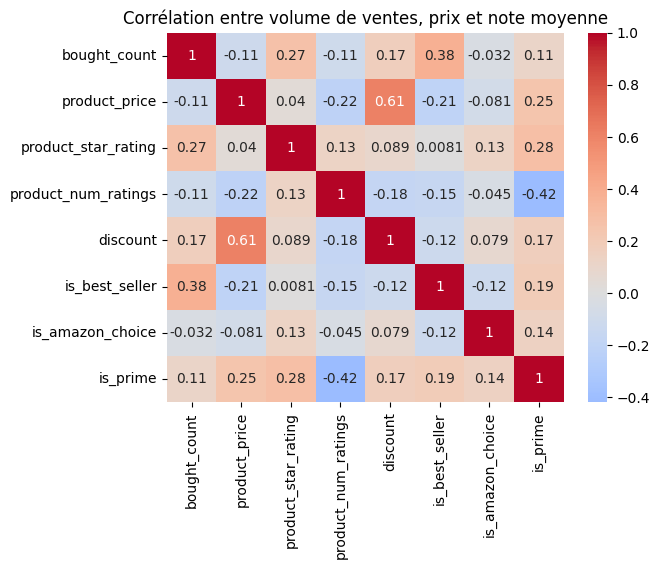

In [28]:
# Sélection des colonnes qui m'intéressent
corr = df_clean[['bought_count', 'product_price', 'product_star_rating', 'product_num_ratings', 'discount', 'is_best_seller', 'is_amazon_choice', 'is_prime']].corr()

# Heatmap des corrélations
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title("Corrélation entre volume de ventes, prix et note moyenne")
plt.show()

On trouve quelques corrélations intéressantes :
### Corrélations Positives :
- (0.61) Les produits qui ont un prix élevé ont de forted chances d'avoir des grosses réductions
- (0.38) Les produits les plus vendus sont des best seller (ouf)
- (0.27) Les produits avec le plus d'étoiles sont légèrement plus vendus
- Le prix du produit et le nombre d'étoiles est légèrement plus élevé quand le produit est éligible prime, respectivement   (0.25) et (0.28)
### Corrélations Négatives :
- (-0.42) Les produits prime sont moins évalués
- Plus le prix du produit est élevé, moins il aura d'évaluations (-0.21) et moins il aura de chances d'être un best seller (-0.22)

## Quelques visualisations supplémentaires

In [ ]:
# J'ai galéré pour obtenir une courbe croissante à cause de cette ligne
# je codais df_sorted = df.sort_values('product_price')
# mais j'avais une courbe pas croissante, parce que le df était bien trié mais les indexs inchangés,
# donc quand je traçais la courbe ça changeais rien à mon problème

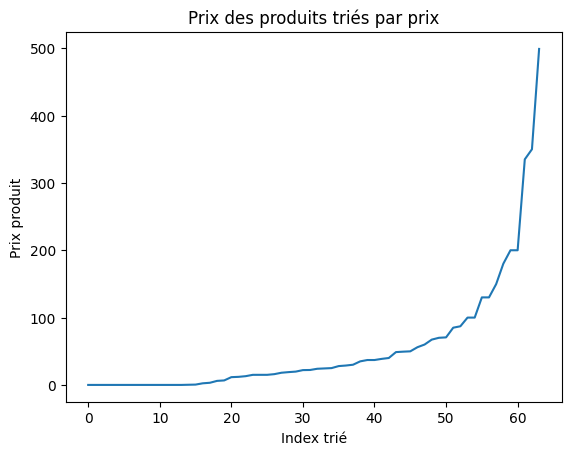

In [49]:
# Et voici la solution, il fallait ajouter .reset_index(drop=True) pour réinitialiser l'indec
df_sorted = df.sort_values('product_price').reset_index(drop=True)

plt.plot(df_sorted.index, df_sorted['product_price'])
plt.xlabel("Index trié")
plt.ylabel("Prix produit")
plt.title("Prix des produits croissant")
plt.show()

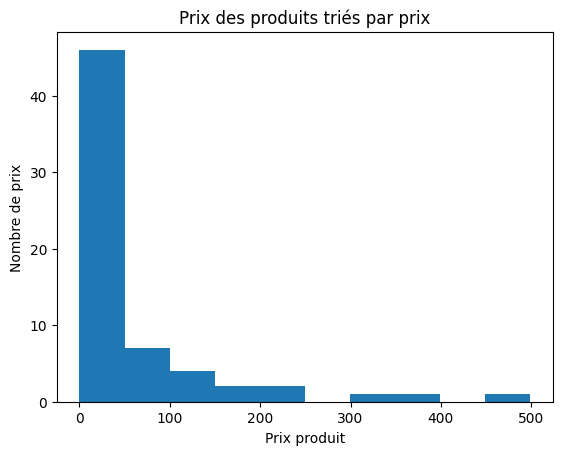

In [73]:
df_sorted = df.sort_values('product_price')
df_sorted['product_price'].plot(kind='hist', bins=10)
plt.xlabel("Prix produit")
plt.ylabel("Nombre de prix")
plt.title("Prix des produits triés par prix")
plt.show()

On en déduit que la plupart des produits on un prix inférieur à $50

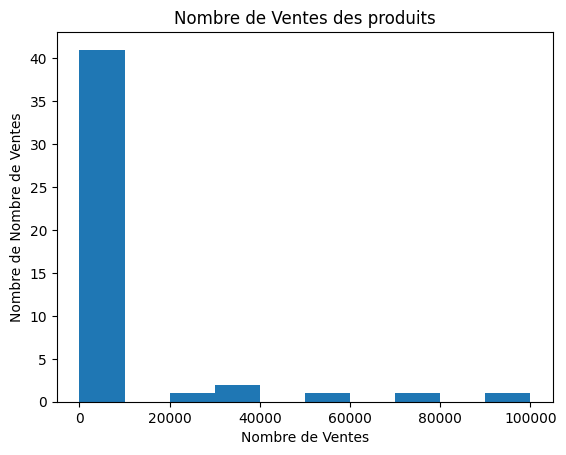

In [78]:
df_clean = df_clean.sort_values('bought_count')
df_clean['bought_count'].plot(kind='hist', bins=10)
plt.xlabel("Nombre de Ventes")
plt.ylabel("Nombre de Nombre de Ventes")
plt.title("Nombre de Ventes des produits")
plt.show()

On en déduit que beaucoup d'articles font moins de 10K ventes.

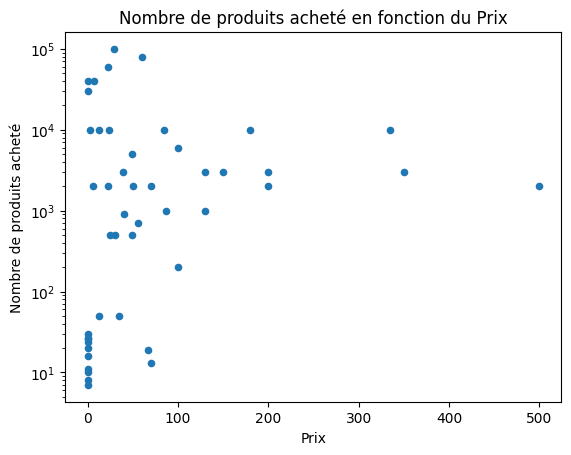

In [88]:
df_clean.plot(kind='scatter', x='product_price', y='bought_count')
plt.yscale('log')
plt.xlabel("Prix")
plt.ylabel("Nombre de produits acheté")
plt.title("Nombre de produits acheté en fonction du Prix")
plt.show()

La corrélation est assez faible (-0.11 d'après la heatmap) mais on voit que quand le prix augmente, le nombre de produits acheté descend

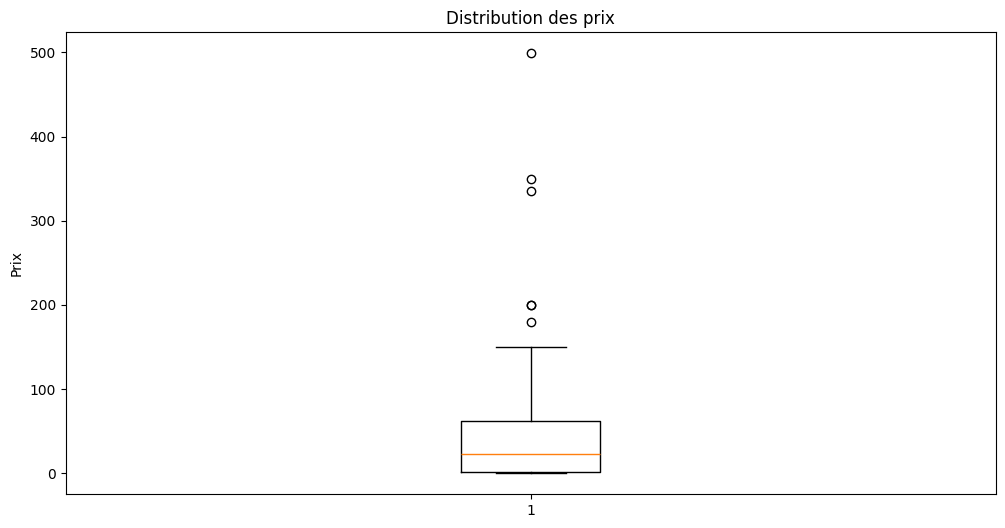

In [103]:
plt.figure(figsize=(12,6))
plt.boxplot(df['product_price'])
plt.ylabel("Prix")
plt.title("Distribution des prix")
plt.show()

- La boîte est basse -> les prix sont globalement moins élevés
- La médiane est proche du bas -> la majorité des produits est moins chère
- Longues moustaches -> grande variation des prix
- Beaucoup de points isolés -> présence de produits très chers par rapport à la majorité